In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 

In [61]:
df = pd.read_csv('C:\\python\\Taxi_Trip_analysis\\taxi_dataset.csv' , low_memory= False)

In [62]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [63]:
df.drop(columns=['VendorID','mta_tax','store_and_fwd_flag','improvement_surcharge'],inplace= True)

In [64]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,238.0,239.0,1.0,6.0,3.0,1.47,0.0,11.27,2.5
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,239.0,238.0,1.0,7.0,3.0,1.50,0.0,12.30,2.5
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,238.0,238.0,1.0,6.0,3.0,1.00,0.0,10.80,2.5
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,238.0,151.0,1.0,5.5,0.5,1.36,0.0,8.16,0.0
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,193.0,193.0,2.0,3.5,0.5,0.00,0.0,4.80,0.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11916667 entries, 0 to 11916666
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   passenger_count        float64
 3   trip_distance          float64
 4   RatecodeID             float64
 5   PULocationID           float64
 6   DOLocationID           float64
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  total_amount           float64
 13  congestion_surcharge   float64
dtypes: float64(12), object(2)
memory usage: 1.2+ GB


#### I have extracted the date and time(in 24 hour format) and created new columns with it 

In [66]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

df['pickup_date'] = df['tpep_pickup_datetime'].dt.date

df['pickup_time'] = df['tpep_pickup_datetime'].dt.strftime('%H:%M:%S')

In [67]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.date

df['dropoff_time'] = df['tpep_dropoff_datetime'].dt.strftime('%H:%M:%S')

In [68]:
df.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'] , inplace = True)

In [69]:
# converting the object dtype to date and time 
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['pickup_time'] = pd.to_timedelta(df['pickup_time'])

df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['dropoff_time'] = pd.to_timedelta(df['dropoff_time'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11916667 entries, 0 to 11916666
Data columns (total 16 columns):
 #   Column                Dtype          
---  ------                -----          
 0   passenger_count       float64        
 1   trip_distance         float64        
 2   RatecodeID            float64        
 3   PULocationID          float64        
 4   DOLocationID          float64        
 5   payment_type          float64        
 6   fare_amount           float64        
 7   extra                 float64        
 8   tip_amount            float64        
 9   tolls_amount          float64        
 10  total_amount          float64        
 11  congestion_surcharge  float64        
 12  pickup_date           datetime64[ns] 
 13  pickup_time           timedelta64[ns]
 14  dropoff_date          datetime64[ns] 
 15  dropoff_time          timedelta64[ns]
dtypes: datetime64[ns](2), float64(12), timedelta64[ns](2)
memory usage: 1.4 GB


In [71]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1.0,1.2,1.0,238.0,239.0,1.0,6.0,3.0,1.47,0.0,11.27,2.5,2020-01-01,0 days 00:28:15,2020-01-01,0 days 00:33:03
1,1.0,1.2,1.0,239.0,238.0,1.0,7.0,3.0,1.50,0.0,12.30,2.5,2020-01-01,0 days 00:35:39,2020-01-01,0 days 00:43:04
2,1.0,0.6,1.0,238.0,238.0,1.0,6.0,3.0,1.00,0.0,10.80,2.5,2020-01-01,0 days 00:47:41,2020-01-01,0 days 00:53:52
3,1.0,0.8,1.0,238.0,151.0,1.0,5.5,0.5,1.36,0.0,8.16,0.0,2020-01-01,0 days 00:55:23,2020-01-01,0 days 01:00:14
4,1.0,0.0,1.0,193.0,193.0,2.0,3.5,0.5,0.00,0.0,4.80,0.0,2020-01-01,0 days 00:01:58,2020-01-01,0 days 00:04:16


# Data Cleaning

In [72]:
## Missing values 

In [73]:
df.isna().sum()

passenger_count         91453
trip_distance               5
RatecodeID              91453
PULocationID                5
DOLocationID                5
payment_type            91453
fare_amount                 5
extra                       5
tip_amount                  5
tolls_amount                5
total_amount                5
congestion_surcharge        5
pickup_date                 5
pickup_time                 5
dropoff_date                5
dropoff_time                5
dtype: int64

In [74]:
# i am droping the rows for all the columns where missing values are only 5  

In [84]:
for i in df.columns:
    if df[i].isna().sum() == 5 :
        df.dropna(subset=[i] ,inplace = True)

In [85]:
df.isna().sum()

passenger_count         91448
trip_distance               0
RatecodeID              91448
PULocationID                0
DOLocationID                0
payment_type            91448
fare_amount                 0
extra                       0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge        0
pickup_date                 0
pickup_time                 0
dropoff_date                0
dropoff_time                0
dtype: int64

In [95]:
# passenger count 
# i am filling the null values with mode of the passenger_count
df['passenger_count'].fillna(df['passenger_count'].mode()[0],inplace= True)

In [98]:
# I am doing same thing with every other null values

# RatecodeID
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace= True)

# payment_type
df['payment_type'].fillna(df['payment_type'].mode()[0],inplace= True)

In [99]:
df.isna().sum()

passenger_count         0
trip_distance           0
RatecodeID              0
PULocationID            0
DOLocationID            0
payment_type            0
fare_amount             0
extra                   0
tip_amount              0
tolls_amount            0
total_amount            0
congestion_surcharge    0
pickup_date             0
pickup_time             0
dropoff_date            0
dropoff_time            0
dtype: int64

## Outliers

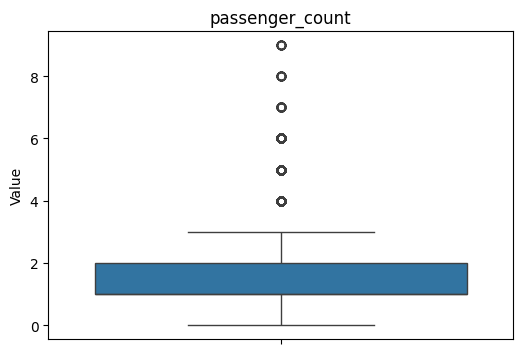

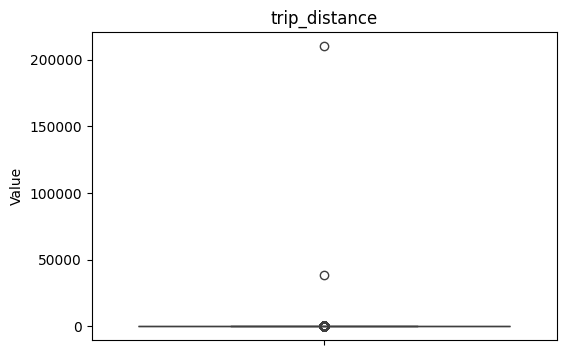

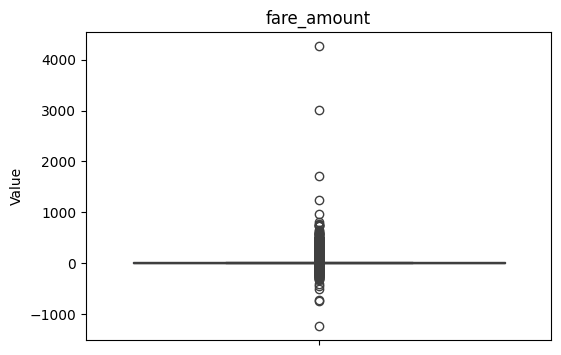

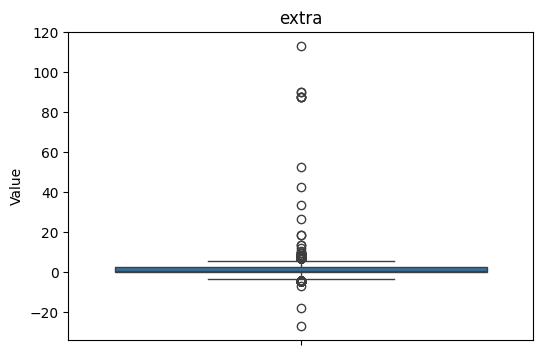

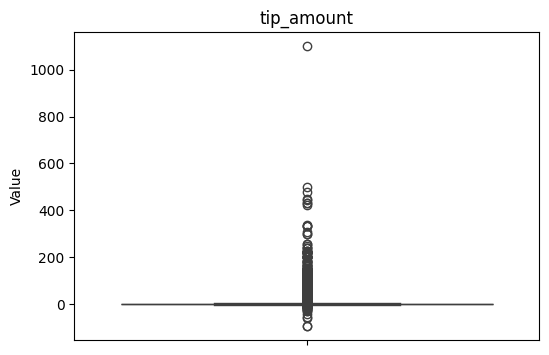

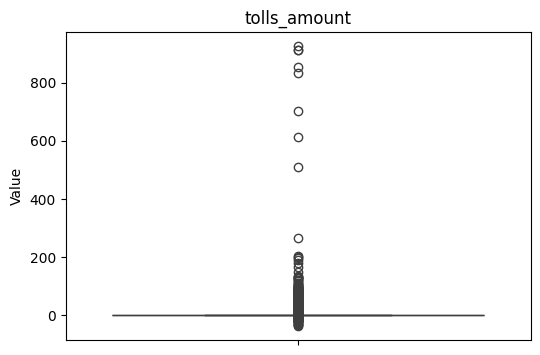

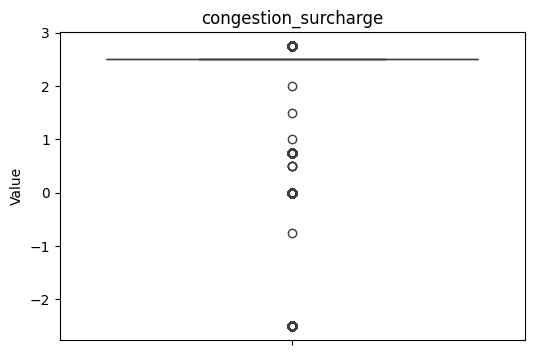

In [101]:
numerical_columns = ['passenger_count','trip_distance','fare_amount','extra','tip_amount','tolls_amount','congestion_surcharge']

# Plot box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col].dropna())
    plt.title(col)
    plt.ylabel('Value')
    plt.show()


In [102]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = ['passenger_count','trip_distance','fare_amount','extra','tip_amount','tolls_amount','congestion_surcharge']

In [103]:
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

In [106]:
df.shape
# So i have removed around 2M outliers 

(8928813, 16)

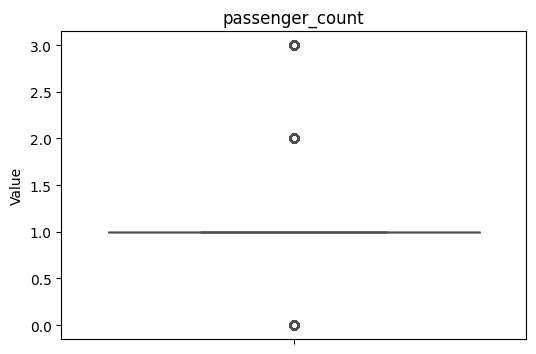

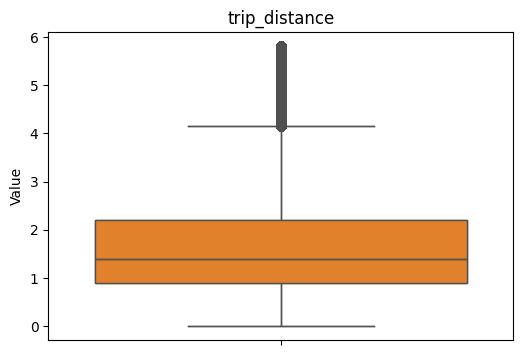

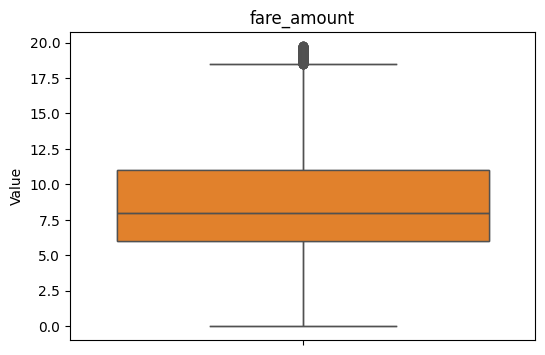

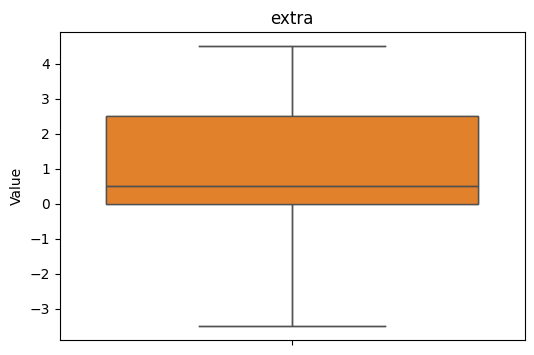

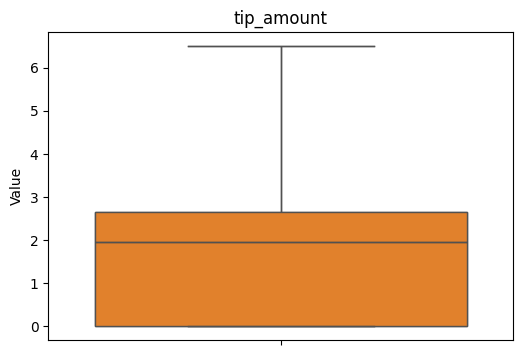

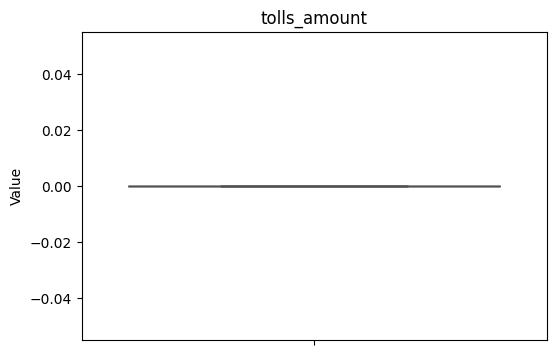

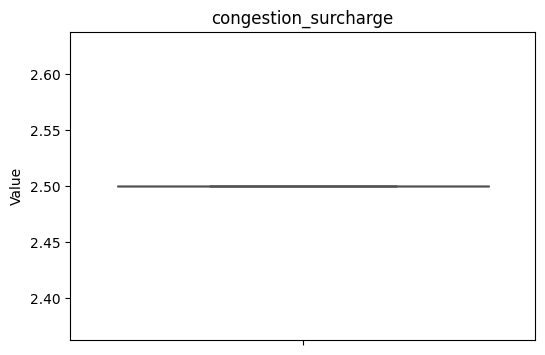

In [108]:
numerical_columns = ['passenger_count','trip_distance','fare_amount','extra','tip_amount','tolls_amount','congestion_surcharge']

# Plot box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col].dropna())
    sns.boxplot(df[col].dropna())
    plt.title(col)
    plt.ylabel('Value')
    plt.show()


# EDA

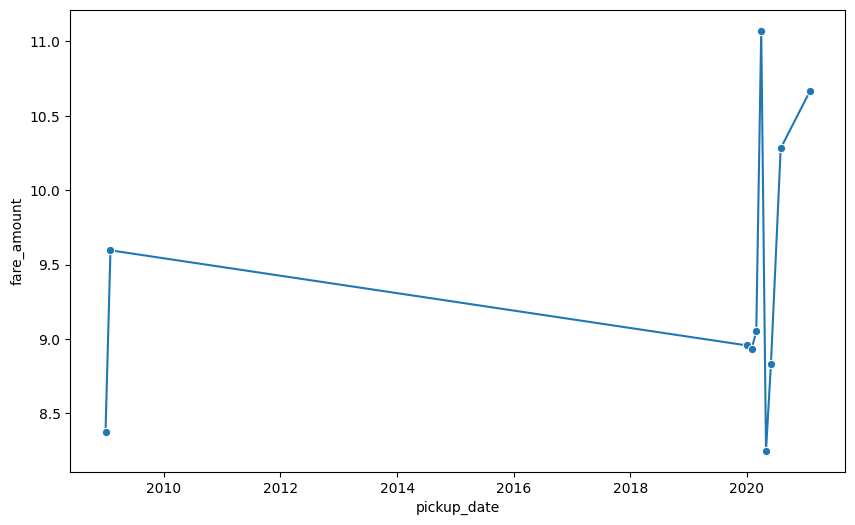

In [109]:
# fare amount over the years
# There are so too many records and it is time consuming to plot them that's why i have down sampled it 
df_resampled = df.set_index('pickup_date').resample('ME').mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x = df_resampled['pickup_date'],y = df_resampled['fare_amount'], marker='o', linestyle='-')
plt.show()
# I think the increase in fare price is caused my covid 

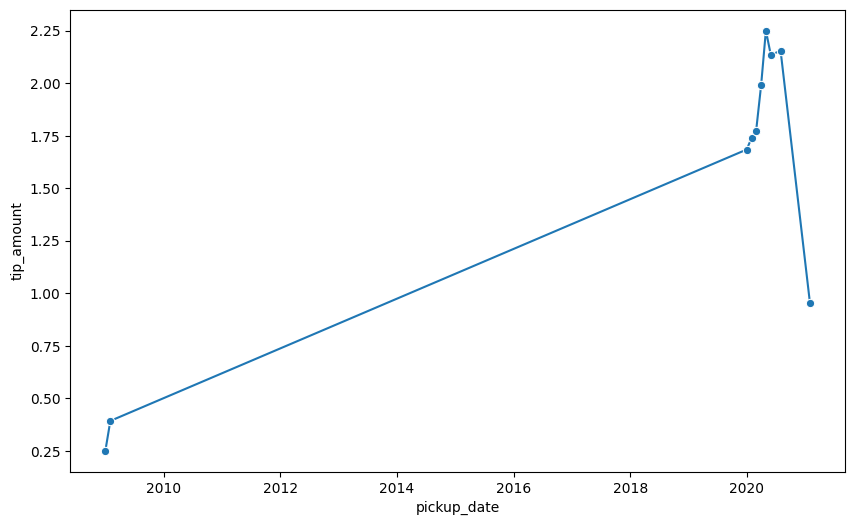

In [110]:
# Let's check it tips have increased over the years
# tip amount over the years

df_resampled = df.set_index('pickup_date').resample('ME').mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x = df_resampled['pickup_date'],y = df_resampled['tip_amount'], marker='o', linestyle='-')
plt.show()

In [111]:
df['trip_distance'].describe()
# i don't know how the min distance is a neg value must be a outliers so let's remove them

count    8.928813e+06
mean     1.685962e+00
std      1.060685e+00
min      0.000000e+00
25%      9.000000e-01
50%      1.400000e+00
75%      2.200000e+00
max      5.810000e+00
Name: trip_distance, dtype: float64

<Axes: ylabel='Density'>

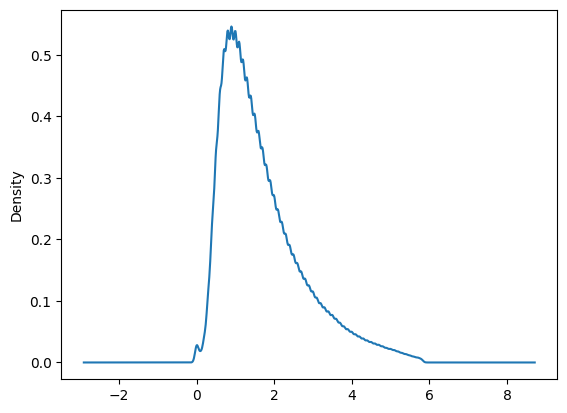

In [112]:
df['trip_distance'].plot(kind = 'kde')

In [113]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,0.0,11.3,2.5,2008-12-31,0 days 23:05:29,2008-12-31,0 days 23:13:40
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,0.0,13.3,2.5,2008-12-31,0 days 23:17:15,2008-12-31,0 days 23:32:32
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,0.0,10.3,2.5,2008-12-31,0 days 23:03:42,2009-01-01,0 days 06:45:52
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,0.0,20.3,2.5,2008-12-31,0 days 23:06:13,2008-12-31,0 days 23:37:14
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,0.0,7.3,2.5,2008-12-31,0 days 23:35:00,2008-12-31,0 days 23:36:53


In [116]:
df['RatecodeID'].value_counts()
# Most of the fare are charged according to rate code 1

RatecodeID
1.0     8925678
5.0        2639
99.0        274
4.0         196
2.0          22
3.0           4
Name: count, dtype: int64

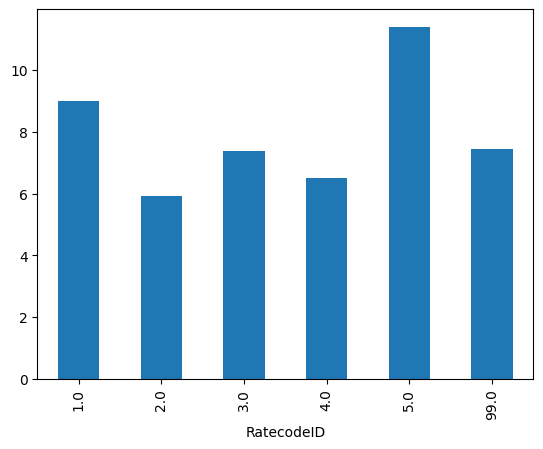

In [119]:
df.groupby('RatecodeID').fare_amount.mean().plot(kind='bar')
plt.show()
# the rate code 5 charges the most 

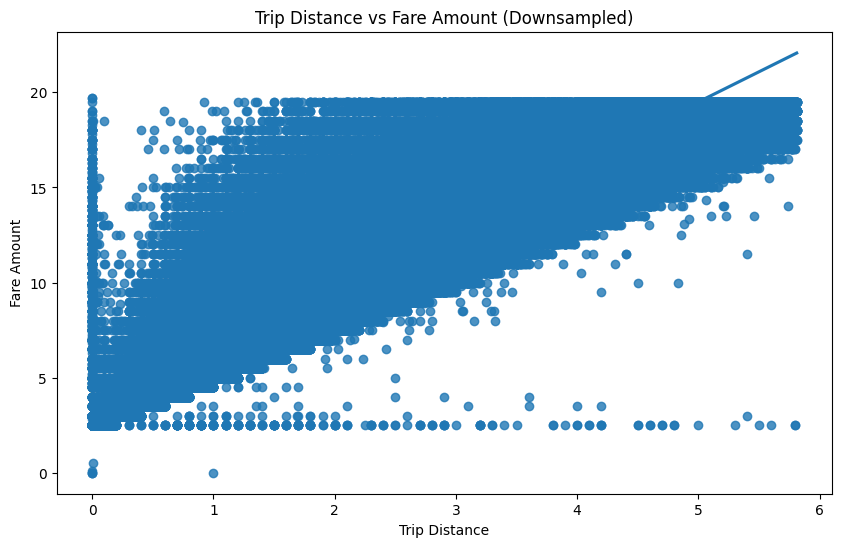

In [123]:
downsampled_df = df.sample(frac=0.1, random_state=42)  # Sampling 10% of the data

# Plot trip distance vs fare amount for the downsampled data
plt.figure(figsize=(10, 6))
sns.regplot(x=downsampled_df['trip_distance'], y=downsampled_df['fare_amount'])
plt.title('Trip Distance vs Fare Amount (Downsampled)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

In [125]:
# Creating the Time column (time taken for a trip)

In [133]:
trip_duration = df['dropoff_time'] - df['pickup_time']

# Extracting hours and minutes from trip duration
hours = trip_duration.dt.components['hours']
minutes = trip_duration.dt.components['minutes']

# Creating a new column 'trip_time' with hours and minutes formatted as 'HH:MM'
df['trip_time'] = hours.map("{:02d}".format) + ":" + minutes.map("{:02d}".format)

In [134]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,0.0,11.3,2.5,2008-12-31,0 days 23:05:29,2008-12-31,0 days 23:13:40,00:08
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,0.0,13.3,2.5,2008-12-31,0 days 23:17:15,2008-12-31,0 days 23:32:32,00:15
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,0.0,10.3,2.5,2008-12-31,0 days 23:03:42,2009-01-01,0 days 06:45:52,07:42
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,0.0,20.3,2.5,2008-12-31,0 days 23:06:13,2008-12-31,0 days 23:37:14,00:31
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,0.0,7.3,2.5,2008-12-31,0 days 23:35:00,2008-12-31,0 days 23:36:53,00:01


In [139]:
df['trip_time']  = df['trip_time'] + ':00'
df['trip_time'] = pd.to_timedelta(df['trip_time'])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8928813 entries, 9531130 to 275516
Data columns (total 17 columns):
 #   Column                Dtype          
---  ------                -----          
 0   passenger_count       float64        
 1   trip_distance         float64        
 2   RatecodeID            float64        
 3   PULocationID          float64        
 4   DOLocationID          float64        
 5   payment_type          float64        
 6   fare_amount           float64        
 7   extra                 float64        
 8   tip_amount            float64        
 9   tolls_amount          float64        
 10  total_amount          float64        
 11  congestion_surcharge  float64        
 12  pickup_date           datetime64[ns] 
 13  pickup_time           timedelta64[ns]
 14  dropoff_date          datetime64[ns] 
 15  dropoff_time          timedelta64[ns]
 16  trip_time             timedelta64[ns]
dtypes: datetime64[ns](2), float64(12), timedelta64[ns](3)
memory usag

In [150]:
df['trip_time'].describe()

count                      8928813
mean     0 days 00:12:22.747700058
std      0 days 00:56:55.721267568
min                0 days 00:00:00
25%                0 days 00:06:00
50%                0 days 00:09:00
75%                0 days 00:14:00
max                0 days 23:59:00
Name: trip_time, dtype: object

In [152]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,0.0,11.3,2.5,2008-12-31,0 days 23:05:29,2008-12-31,0 days 23:13:40,0 days 00:08:00
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,0.0,13.3,2.5,2008-12-31,0 days 23:17:15,2008-12-31,0 days 23:32:32,0 days 00:15:00
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,0.0,10.3,2.5,2008-12-31,0 days 23:03:42,2009-01-01,0 days 06:45:52,0 days 07:42:00
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,0.0,20.3,2.5,2008-12-31,0 days 23:06:13,2008-12-31,0 days 23:37:14,0 days 00:31:00
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,0.0,7.3,2.5,2008-12-31,0 days 23:35:00,2008-12-31,0 days 23:36:53,0 days 00:01:00


In [153]:
# number of passengers vs fare

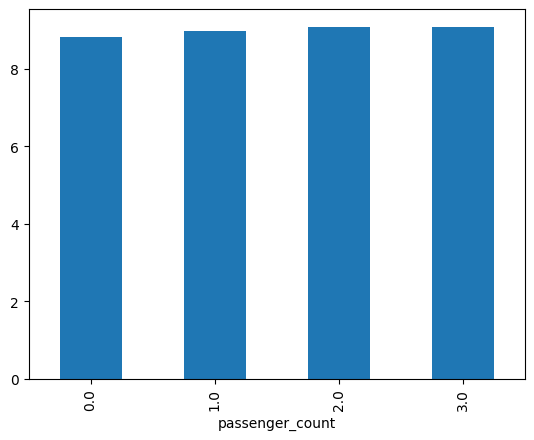

In [160]:
df.groupby('passenger_count').fare_amount.mean().plot(kind = 'bar')
plt.show()

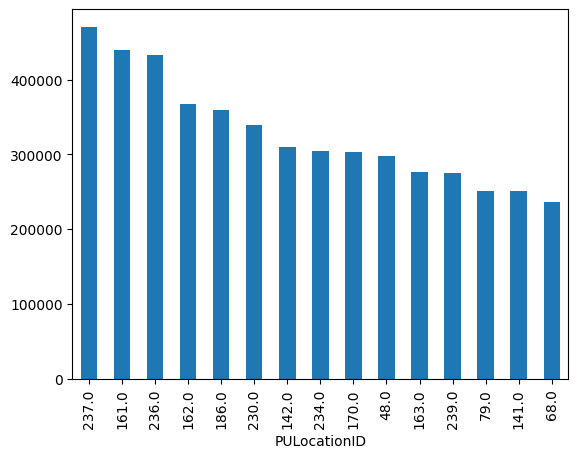

In [165]:
# top 15 most famous pickup locations
df['PULocationID'].value_counts().sort_values(ascending= False).head(15).plot(kind = 'bar')
plt.show()

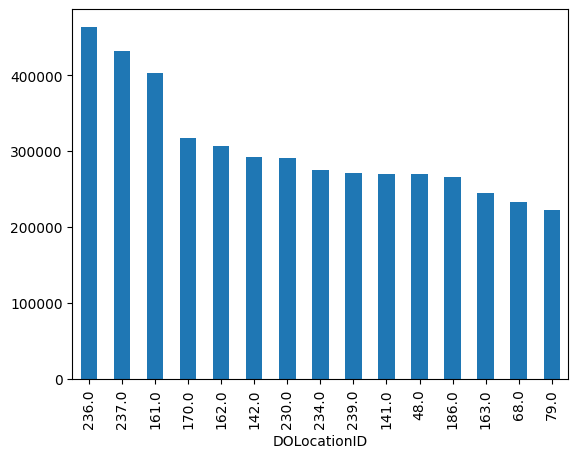

In [166]:
# top 15 most famous dropoff locations
df['DOLocationID'].value_counts().sort_values(ascending= False).head(15).plot(kind = 'bar')
plt.show()

<Axes: xlabel='PULocationID'>

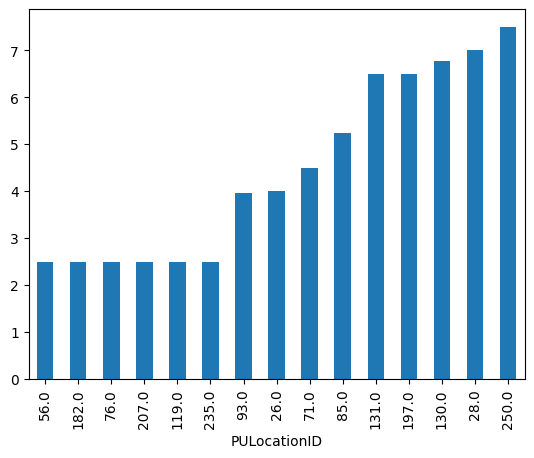

In [173]:
df.groupby('PULocationID').fare_amount.mean().sort_values().head(15).plot(kind = 'bar')
# LocationID 250.0 charges max fare 

In [174]:
# payment type and tip amount

In [176]:
df.groupby('payment_type').tip_amount.mean()
# Those who pay with payment type 1 gives more tips to the driver 

payment_type
1.0    2.301017
2.0    0.000169
3.0    0.002361
4.0    0.001855
Name: tip_amount, dtype: float64

In [177]:
# tolls amount

In [178]:
df['tolls_amount'].describe()

count    8928813.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: tolls_amount, dtype: float64

In [179]:
df.drop(columns=['tolls_amount'], inplace= True)

In [180]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,2.5,2008-12-31,0 days 23:05:29,2008-12-31,0 days 23:13:40,0 days 00:08:00
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,2.5,2008-12-31,0 days 23:17:15,2008-12-31,0 days 23:32:32,0 days 00:15:00
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,2.5,2008-12-31,0 days 23:03:42,2009-01-01,0 days 06:45:52,0 days 07:42:00
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,2.5,2008-12-31,0 days 23:06:13,2008-12-31,0 days 23:37:14,0 days 00:31:00
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,2.5,2008-12-31,0 days 23:35:00,2008-12-31,0 days 23:36:53,0 days 00:01:00


In [182]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    8928813
Name: count, dtype: int64

In [184]:
df.drop(columns = ['congestion_surcharge'] , inplace = True)

In [185]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,2008-12-31,0 days 23:05:29,2008-12-31,0 days 23:13:40,0 days 00:08:00
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,2008-12-31,0 days 23:17:15,2008-12-31,0 days 23:32:32,0 days 00:15:00
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,2008-12-31,0 days 23:03:42,2009-01-01,0 days 06:45:52,0 days 07:42:00
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,2008-12-31,0 days 23:06:13,2008-12-31,0 days 23:37:14,0 days 00:31:00
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,2008-12-31,0 days 23:35:00,2008-12-31,0 days 23:36:53,0 days 00:01:00


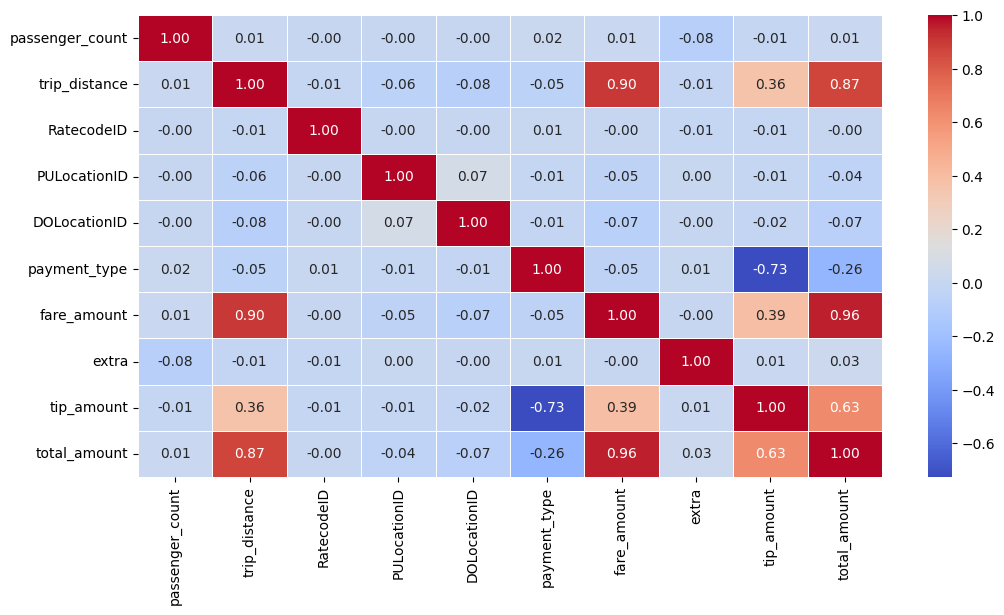

In [190]:
num_cols = df.select_dtypes('float','int')
plt.figure(figsize=(12,6))
sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

# Model Building and Evaluation

In [193]:
# This is a very big dataset so i am removing some columns to reduce run time

In [197]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,pickup_date,pickup_time,dropoff_date,dropoff_time,trip_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,2008-12-31,0 days 23:05:29,2008-12-31,0 days 23:13:40,0 days 00:08:00
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,2008-12-31,0 days 23:17:15,2008-12-31,0 days 23:32:32,0 days 00:15:00
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,2008-12-31,0 days 23:03:42,2009-01-01,0 days 06:45:52,0 days 07:42:00
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,2008-12-31,0 days 23:06:13,2008-12-31,0 days 23:37:14,0 days 00:31:00
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,2008-12-31,0 days 23:35:00,2008-12-31,0 days 23:36:53,0 days 00:01:00


In [198]:
df.drop(columns=['dropoff_date'],inplace=True)

In [199]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,pickup_date,pickup_time,dropoff_time,trip_time
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,2008-12-31,0 days 23:05:29,0 days 23:13:40,0 days 00:08:00
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,2008-12-31,0 days 23:17:15,0 days 23:32:32,0 days 00:15:00
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,2008-12-31,0 days 23:03:42,0 days 06:45:52,0 days 07:42:00
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,2008-12-31,0 days 23:06:13,0 days 23:37:14,0 days 00:31:00
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,2008-12-31,0 days 23:35:00,0 days 23:36:53,0 days 00:01:00


In [200]:
# converting the pickup_data into year,month,date 
# Extract year, month, and day (date) from 'pickup_date' column
df['year'] = df['pickup_date'].dt.year
df['month'] = df['pickup_date'].dt.month
df['date'] = df['pickup_date'].dt.day

In [202]:
df.drop(columns=['pickup_date'],inplace=True)

In [203]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,pickup_time,dropoff_time,trip_time,year,month,date
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,0 days 23:05:29,0 days 23:13:40,0 days 00:08:00,2008,12,31
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,0 days 23:17:15,0 days 23:32:32,0 days 00:15:00,2008,12,31
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,0 days 23:03:42,0 days 06:45:52,0 days 07:42:00,2008,12,31
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,0 days 23:06:13,0 days 23:37:14,0 days 00:31:00,2008,12,31
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,0 days 23:35:00,0 days 23:36:53,0 days 00:01:00,2008,12,31


In [205]:
df['pickup_hour'] = df['pickup_time'].dt.components['hours']
df['dropoff_hour'] = df['dropoff_time'].dt.components['hours']

In [206]:
df.drop(columns=['pickup_time','dropoff_time'], inplace = True)

In [207]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,trip_time,year,month,date,pickup_hour,dropoff_hour
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,0 days 00:08:00,2008,12,31,23,23
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,0 days 00:15:00,2008,12,31,23,23
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,0 days 07:42:00,2008,12,31,23,6
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,0 days 00:31:00,2008,12,31,23,23
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,0 days 00:01:00,2008,12,31,23,23


In [211]:
df.drop(columns=['trip_time'] , inplace= True)

In [212]:
df.head()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,total_amount,year,month,date,pickup_hour,dropoff_hour
9531130,1.0,1.36,1.0,148.0,113.0,2.0,7.5,0.5,0.0,11.3,2008,12,31,23,23
3143358,1.0,2.34,1.0,162.0,263.0,2.0,9.5,0.5,0.0,13.3,2008,12,31,23,23
8577644,1.0,1.36,1.0,142.0,161.0,1.0,6.0,0.0,1.0,10.3,2008,12,31,23,6
3400011,1.0,3.48,1.0,144.0,230.0,2.0,16.5,0.5,0.0,20.3,2008,12,31,23,23
3143359,1.0,0.42,1.0,263.0,263.0,2.0,3.5,0.5,0.0,7.3,2008,12,31,23,23


In [214]:
# frequency encoding the PULocationID , DOLocationID and year columns
frequency_map = df['PULocationID'].value_counts(normalize=True)

df['pulocationid'] = df['PULocationID'].map(frequency_map)


In [215]:
df.drop(columns=['PULocationID'], inplace = True)

In [217]:
frequency_map = df['DOLocationID'].value_counts(normalize=True)

df['dulocationid'] = df['DOLocationID'].map(frequency_map)


In [218]:
df.drop(columns=['DOLocationID'], inplace = True)

In [219]:
frequency_map = df['year'].value_counts(normalize=True)

df['Year'] = df['year'].map(frequency_map)


In [220]:
df.drop(columns=['year'] , inplace = True)

In [221]:
df.head()

,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,total_amount,month,date,pickup_hour,dropoff_hour,pulocationid,dulocationid,Year
9531130,1.0,1.36,1.0,2.0,7.5,0.5,0.0,11.3,12,31,23,23,0.013180,0.015506,8.959758e-07
3143358,1.0,2.34,1.0,2.0,9.5,0.5,0.0,13.3,12,31,23,23,0.041089,0.022142,8.959758e-07
8577644,1.0,1.36,1.0,1.0,6.0,0.0,1.0,10.3,12,31,23,6,0.034676,0.045134,8.959758e-07
3400011,1.0,3.48,1.0,2.0,16.5,0.5,0.0,20.3,12,31,23,23,0.010331,0.032609,8.959758e-07
3143359,1.0,0.42,1.0,2.0,3.5,0.5,0.0,7.3,12,31,23,23,0.021601,0.022142,8.959758e-07


In [222]:
min_month = df['month'].min()
max_month = df['month'].max()
min_date = df['date'].min()
max_date = df['date'].max()
min_pickup_hour = df['pickup_hour'].min()
max_pickup_hour = df['pickup_hour'].max()
min_dropoff_hour = df['dropoff_hour'].min()
max_dropoff_hour = df['dropoff_hour'].max()

# Min-max normalize 'month' column
df['normalized_month'] = (df['month'] - min_month) / (max_month - min_month)

# Min-max normalize 'date' column
df['normalized_date'] = (df['date'] - min_date) / (max_date - min_date)

# Min-max normalize 'pickup_hour' column
df['normalized_pickup_hour'] = (df['pickup_hour'] - min_pickup_hour) / (max_pickup_hour - min_pickup_hour)

# Min-max normalize 'dropoff_hour' column
df['normalized_dropoff_hour'] = (df['dropoff_hour'] - min_dropoff_hour) / (max_dropoff_hour - min_dropoff_hour)

# Droping the original columns
df.drop(columns=['month', 'date', 'pickup_hour', 'dropoff_hour'], inplace=True)


In [223]:
df.head()

,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,total_amount,pulocationid,dulocationid,Year,normalized_month,normalized_date,normalized_pickup_hour,normalized_dropoff_hour
9531130,1.0,1.36,1.0,2.0,7.5,0.5,0.0,11.3,0.013180,0.015506,8.959758e-07,1.0,1.0,1.0,1.00000
3143358,1.0,2.34,1.0,2.0,9.5,0.5,0.0,13.3,0.041089,0.022142,8.959758e-07,1.0,1.0,1.0,1.00000
8577644,1.0,1.36,1.0,1.0,6.0,0.0,1.0,10.3,0.034676,0.045134,8.959758e-07,1.0,1.0,1.0,0.26087
3400011,1.0,3.48,1.0,2.0,16.5,0.5,0.0,20.3,0.010331,0.032609,8.959758e-07,1.0,1.0,1.0,1.00000
3143359,1.0,0.42,1.0,2.0,3.5,0.5,0.0,7.3,0.021601,0.022142,8.959758e-07,1.0,1.0,1.0,1.00000


In [224]:
# normalizing the fare-amount column

In [225]:
min_fare_amount = df['fare_amount'].min()
max_fare_amount = df['fare_amount'].max()

# Min-max normalize 'fare_amount' column
df['normalized_fare_amount'] = (df['fare_amount'] - min_fare_amount) / (max_fare_amount - min_fare_amount)

# Droping the original 'fare_amount' column
df.drop(columns=['fare_amount'], inplace=True)

In [226]:
df.head()

,passenger_count,trip_distance,RatecodeID,payment_type,extra,tip_amount,total_amount,pulocationid,dulocationid,Year,normalized_month,normalized_date,normalized_pickup_hour,normalized_dropoff_hour,normalized_fare_amount
9531130,1.0,1.36,1.0,2.0,0.5,0.0,11.3,0.013180,0.015506,8.959758e-07,1.0,1.0,1.0,1.00000,0.379747
3143358,1.0,2.34,1.0,2.0,0.5,0.0,13.3,0.041089,0.022142,8.959758e-07,1.0,1.0,1.0,1.00000,0.481013
8577644,1.0,1.36,1.0,1.0,0.0,1.0,10.3,0.034676,0.045134,8.959758e-07,1.0,1.0,1.0,0.26087,0.303797
3400011,1.0,3.48,1.0,2.0,0.5,0.0,20.3,0.010331,0.032609,8.959758e-07,1.0,1.0,1.0,1.00000,0.835443
3143359,1.0,0.42,1.0,2.0,0.5,0.0,7.3,0.021601,0.022142,8.959758e-07,1.0,1.0,1.0,1.00000,0.177215


### I have reduced the data

In [231]:
downsampled_df = df.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = downsampled_df.drop(columns=['total_amount'])
y = downsampled_df['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

models = [('Linear Regression', lr_model), ('Decision Tree', dt_model), ('Random Forest', rf_model)]
for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print()


Linear Regression:
Mean Squared Error: 0.1261637201722711
R-squared: 0.9936466288527924

Decision Tree:
Mean Squared Error: 0.03496877029902543
R-squared: 0.9982390375302204

Random Forest:
Mean Squared Error: 0.01965026380109749
R-squared: 0.9990104491299208

